First off we need to check if all necessary libraries are installed

In [ ]:
#verify that scipy is installed
!pip install scipy
!pip install sympy
#verify that numpy is installed
!pip install numpy
#verify that matplotlib is installed
!pip install matplotlib

Suggestions for lab exercises.

# Variables and assignment

## Exercise 1

Remember that $n! = n \times (n - 1) \times \dots \times 2 \times 1$. Compute $15!$, assigning the result to a sensible variable name.

#### Solution

In [1]:
fifteen_factorial = 15*14*13*12*11*10*9*8*7*6*5*4*3*2*1
print(fifteen_factorial)

1307674368000


## Exercise 2

Using the `math` module, check your result for $15$ factorial. You should explore the help for the `math` library and its functions, using eg tab-completion, the spyder inspector, or online sources.

#### Solution

In [2]:
import math
print(math.factorial(15))
print("Result correct?", math.factorial(15) == fifteen_factorial)

1307674368000
Result correct? True


## Exercise 3

[Stirling's approximation](http://mathworld.wolfram.com/StirlingsApproximation.html) gives that, for large enough $n$, 

\begin{equation}
  n! \simeq \sqrt{2 \pi} n^{n + 1/2} e^{-n}.
\end{equation}

Using functions and constants from the `math` library, compare the results of $n!$ and Stirling's approximation for $n = 5, 10, 15, 20$. In what sense does the approximation improve?

#### Solution

In [3]:
print(math.factorial(5), math.sqrt(2*math.pi)*5**(5+0.5)*math.exp(-5))
print(math.factorial(10), math.sqrt(2*math.pi)*10**(10+0.5)*math.exp(-10))
print(math.factorial(15), math.sqrt(2*math.pi)*15**(15+0.5)*math.exp(-15))
print(math.factorial(20), math.sqrt(2*math.pi)*20**(20+0.5)*math.exp(-20))
print("Absolute differences:")
print(math.factorial(5) - math.sqrt(2*math.pi)*5**(5+0.5)*math.exp(-5))
print(math.factorial(10) - math.sqrt(2*math.pi)*10**(10+0.5)*math.exp(-10))
print(math.factorial(15) - math.sqrt(2*math.pi)*15**(15+0.5)*math.exp(-15))
print(math.factorial(20) - math.sqrt(2*math.pi)*20**(20+0.5)*math.exp(-20))
print("Relative differences:")
print((math.factorial(5) - math.sqrt(2*math.pi)*5**(5+0.5)*math.exp(-5)) / math.factorial(5))
print((math.factorial(10) - math.sqrt(2*math.pi)*10**(10+0.5)*math.exp(-10)) / math.factorial(10))
print((math.factorial(15) - math.sqrt(2*math.pi)*15**(15+0.5)*math.exp(-15)) / math.factorial(15))
print((math.factorial(20) - math.sqrt(2*math.pi)*20**(20+0.5)*math.exp(-20)) / math.factorial(20))

120 118.01916795759007
3628800 3598695.6187410355
1307674368000 1300430722199.4658
2432902008176640000 2.422786846761133e+18
Absolute differences:
1.9808320424099293
30104.38125896454
7243645800.53418
1.0115161415506944e+16
Relative differences:
0.016506933686749412
0.00829596044393864
0.00553933454519939
0.004157652622880542


We see that the relative error decreases, whilst the absolute error grows (significantly).

# Basic functions

## Exercise 1

Write a function to calculate the volume of a cuboid with edge lengths $a, b, c$. Test your code on sample values such as

1. $a=1, b=1, c=1$ (result should be $1$);
2. $a=1, b=2, c=3.5$ (result should be $7.0$);
3. $a=0, b=1, c=1$ (result should be $0$);
4. $a=2, b=-1, c=1$ (what do you think the result should be?).

#### Solution

In [4]:
def cuboid_volume(a, b, c):
    """
    Compute the volume of a cuboid with edge lengths a, b, c.
    Volume is abc. Only makes sense if all are non-negative.
    
    Parameters
    ----------
    
    a : float
        Edge length 1
    b : float
        Edge length 2
    c : float
        Edge length 3
        
    Returns
    -------
    
    volume : float
        The volume a*b*c
    """
    
    if (a < 0.0) or (b < 0.0) or (c < 0.0):
        print("Negative edge length makes no sense!")
        return 0
    
    return a*b*c

In [5]:
print(cuboid_volume(1,1,1))
print(cuboid_volume(1,2,3.5))
print(cuboid_volume(0,1,1))
print(cuboid_volume(2,-1,1))

1
7.0
0
Negative edge length makes no sense!
0


In later cases, after having covered exceptions, I would suggest raising a `NotImplementedError` for negative edge lengths.

## Exercise 2

Write a function to compute the time (in seconds) taken for an object to fall from a height $H$ (in metres) to the ground, using the formula
\begin{equation}
  h(t) = \frac{1}{2} g t^2.
\end{equation}
Use the value of the acceleration due to gravity $g$ from `scipy.constants.g`. Test your code on sample values such as

1. $H = 1$m (result should be $\approx 0.452$s);
2. $H = 10$m (result should be $\approx 1.428$s);
3. $H = 0$m (result should be $0$s);
4. $H = -1$m (what do you think the result should be?).

#### Solution

In [30]:
def fall_time(H):
    """
    Give the time in seconds for an object to fall to the ground
    from H metres.
    
    Parameters
    ----------
    
    H : float
        Starting height (metres)
        
    Returns
    -------
    
    T : float
        Fall time (seconds)
    """
    
    from math import sqrt
    from scipy.constants import g
    
    if (H < 0):
        print("Negative height makes no sense!")
        return 0
    
    return sqrt(2.0*H/g)
#    return sqrt(2.0*H/scipy.constants(g))

In [31]:
print(fall_time(1))
print(fall_time(10))
print(fall_time(0))
print(fall_time(-1))

0.45160075575178754
1.4280869812290344
0.0
Negative height makes no sense!
0


## Exercise 3

Write a function that computes the area of a triangle with edge lengths $a, b, c$. You may use the formula
\begin{equation}
  A = \sqrt{s (s - a) (s - b) (s - c)}, \qquad s = \frac{a + b + c}{2}.
\end{equation}

Construct your own test cases to cover a range of possibilities.

In [32]:
def triangle_area(a, b, c):
    """
    Compute the area of a triangle with edge lengths a, b, c.
    Area is sqrt(s (s-a) (s-b) (s-c)). 
    s is (a+b+c)/2.
    Only makes sense if all are non-negative.
    
    Parameters
    ----------
    
    a : float
        Edge length 1
    b : float
        Edge length 2
    c : float
        Edge length 3
        
    Returns
    -------
    
    area : float
        The triangle area.
    """
    
    from math import sqrt
    
    if (a < 0.0) or (b < 0.0) or (c < 0.0):
        print("Negative edge length makes no sense!")
        return 0
    
    s = 0.5 * (a + b + c)
    return sqrt(s * (s-a) * (s-b) * (s-c))

In [33]:
print(triangle_area(1,1,1)) # Equilateral; answer sqrt(3)/4 ~ 0.433
print(triangle_area(3,4,5)) # Right triangle; answer 6
print(triangle_area(1,1,0)) # Not a triangle; answer 0
print(triangle_area(-1,1,1)) # Not a triangle; exception or 0.

0.4330127018922193
6.0
0.0
Negative edge length makes no sense!
0


# Floating point numbers

## Exercise 1

Computers cannot, in principle, represent real numbers perfectly. This can lead to problems of accuracy. For example, if

\begin{equation}
  x = 1, \qquad y = 1 + 10^{-14} \sqrt{3}
\end{equation}

then it *should* be true that

\begin{equation}
  10^{14} (y - x) = \sqrt{3}.
\end{equation}

Check how accurately this equation holds in Python and see what this implies about the accuracy of subtracting two numbers that are close together.

#### Solution

In [34]:
from math import sqrt

x = 1.0
y = 1.0 + 1e-14 * sqrt(3.0)
print("The calculation gives {}".format(1e14*(y-x)))
print("The result should be {}".format(sqrt(3.0)))

The calculation gives 1.7319479184152442
The result should be 1.7320508075688772


We see that the first three digits are correct. This isn't too surprising: we expect 16 digits of accuracy for a floating point number, but $x$ and $y$ are identical for the first 14 digits.

## Exercise 2

The standard quadratic formula gives the solutions to

\begin{equation}
  a x^2 + b x + c = 0
\end{equation}

as

\begin{equation}
  x = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2 a}.
\end{equation}

Show that, if $a = 10^{-n} = c$ and $b = 10^n$ then

\begin{equation}
  x = \frac{10^{2 n}}{2} \left( -1 \pm \sqrt{1 - 4 \times 10^{-4n}} \right).
\end{equation}

Using the expansion (from Taylor's theorem)

\begin{equation}
  \sqrt{1 - 10^{-4 n}} \simeq 1 - 2 \times 10^{-4 n} + \dots, \qquad n \gg 1,
\end{equation}

show that

\begin{equation}
  x \simeq -10^{2 n} + 10^{-2 n} \quad \text{and} \quad -10^{-2n}, \qquad n \gg 1.
\end{equation}

#### Solution

This is pen-and-paper work; each step should be re-arranging.

## Exercise 3

By multiplying and dividing by $-b \mp \sqrt{b^2 - 4 a c}$, check that we can also write the solutions to the quadratic equation as

\begin{equation}
  x = \frac{2 c}{-b \mp \sqrt{b^2 - 4 a c}}.
\end{equation}

#### Solution

Using the difference of two squares we get

\begin{equation}
  x = \frac{b^2 - \left( b^2 - 4 a c \right)}{2a \left( -b \mp \sqrt{b^2 - 4 a c} \right)}
\end{equation}

which re-arranges to give the required solution.

## Exercise 4

Using Python, calculate both solutions to the quadratic equation

\begin{equation}
  10^{-n} x^2 + 10^n x + 10^{-n} = 0
\end{equation}

for $n = 3$ and $n = 4$ using both formulas. What do you see? How has floating point accuracy caused problems here?

#### Solution

In [35]:
a = 1e-3
b = 1e3
c = a
formula1_n3_plus = (-b + sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula1_n3_minus = (-b - sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula2_n3_plus = (2.0*c)/(-b + sqrt(b**2 - 4.0*a*c))
formula2_n3_minus = (2.0*c)/(-b - sqrt(b**2 - 4.0*a*c))
print("For n=3, first formula, solutions are {} and {}.".format(formula1_n3_plus, 
                                                                formula1_n3_minus))
print("For n=3, second formula, solutions are {} and {}.".format(formula2_n3_plus, 
                                                                 formula2_n3_minus))

a = 1e-4
b = 1e4
c = a
formula1_n4_plus = (-b + sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula1_n4_minus = (-b - sqrt(b**2 - 4.0*a*c))/(2.0*a)
formula2_n4_plus = (2.0*c)/(-b + sqrt(b**2 - 4.0*a*c))
formula2_n4_minus = (2.0*c)/(-b - sqrt(b**2 - 4.0*a*c))
print("For n=4, first formula, solutions are {} and {}.".format(formula1_n4_plus, 
                                                                formula1_n4_minus))
print("For n=4, second formula, solutions are {} and {}.".format(formula2_n4_plus, 
                                                                 formula2_n4_minus))

For n=3, first formula, solutions are -9.999894245993346e-07 and -999999.999999.
For n=3, second formula, solutions are -1000010.5755125057 and -1.000000000001e-06.
For n=4, first formula, solutions are -9.094947017729282e-09 and -100000000.0.
For n=4, second formula, solutions are -109951162.7776 and -1e-08.


There is a difference in the fifth significant figure in both solutions in the first case, which gets to the third (arguably the second) significant figure in the second case. Comparing to the limiting solutions above, we see that the *larger* root is definitely more accurately captured with the first formula than the second (as the result should be bigger than $10^{-2n}$).

In the second case we have divided by a very small number to get the big number, which loses accuracy.

## Exercise 5

The standard definition of the derivative of a function is

\begin{equation}
  \left. \frac{\text{d} f}{\text{d} x} \right|_{x=X} = \lim_{\delta \to 0} \frac{f(X + \delta) - f(X)}{\delta}.
\end{equation}

We can *approximate* this by computing the result for a *finite* value of $\delta$:

\begin{equation}
  g(x, \delta) = \frac{f(x + \delta) - f(x)}{\delta}.
\end{equation}

Write a function that takes as inputs a function of one variable, $f(x)$, a location $X$, and a step length $\delta$, and returns the approximation to the derivative given by $g$.

#### Solution

In [36]:
def g(f, X, delta):
    """
    Approximate the derivative of a given function at a point.
    
    Parameters
    ----------
    
    f : function
        Function to be differentiated
    X : real
        Point at which the derivative is evaluated
    delta : real
        Step length
        
    Returns
    -------
    
    g : real
        Approximation to the derivative
    """
    
    return (f(X+delta) - f(X)) / delta

## Exercise 6

The function $f_1(x) = e^x$ has derivative with the exact value $1$ at $x=0$. Compute the approximate derivative using your function above, for $\delta = 10^{-2 n}$ with $n = 1, \dots, 7$. You should see the results initially improve, then get worse. Why is this?

#### Solution

In [37]:
from math import exp
for n in range(1, 8):
    print("For n={}, the approx derivative is {}.".format(n, g(exp, 0.0, 10**(-2.0*n))))

For n=1, the approx derivative is 1.005016708416795.
For n=2, the approx derivative is 1.000050001667141.
For n=3, the approx derivative is 1.0000004999621837.
For n=4, the approx derivative is 0.999999993922529.
For n=5, the approx derivative is 1.000000082740371.
For n=6, the approx derivative is 1.000088900582341.
For n=7, the approx derivative is 0.9992007221626409.


We have a combination of floating point inaccuracies: in the numerator we have two terms that are nearly equal, leading to a very small number. We then divide two very small numbers. This is inherently inaccurate.

This does not mean that you can't calculate derivatives to high accuracy, but alternative approaches are definitely recommended.

# Prime numbers

## Exercise 1

Write a function that tests if a number is prime. Test it by writing out all prime numbers less than 50.

#### Solution

This is a "simple" solution, but not efficient.

In [38]:
def isprime(n):
    """
    Checks to see if an integer is prime.
    
    Parameters
    ----------
    
    n : integer
        Number to check
        
    Returns
    -------
    
    isprime : Boolean
        If n is prime
    """
    
    # No number less than 2 can be prime
    if n < 2:
        return False
    
    # We only need to check for divisors up to sqrt(n)
    for m in range(2, int(n**0.5)+1):
        if n%m == 0:
            return False
    
    # If we've got this far, there are no divisors.
    return True

In [39]:
for n in range(50):
    if isprime(n):
        print("Function says that {} is prime.".format(n))

Function says that 2 is prime.
Function says that 3 is prime.
Function says that 5 is prime.
Function says that 7 is prime.
Function says that 11 is prime.
Function says that 13 is prime.
Function says that 17 is prime.
Function says that 19 is prime.
Function says that 23 is prime.
Function says that 29 is prime.
Function says that 31 is prime.
Function says that 37 is prime.
Function says that 41 is prime.
Function says that 43 is prime.
Function says that 47 is prime.


## Exercise 2

500 years ago some believed that the number $2^n - 1$ was prime for *all* primes $n$. Use your function to find the first prime $n$ for which this is not true.

#### Solution

We could do this many ways. This "elegant" solution says:

* Start from the smallest possible $n$ (2).
* Check if $n$ is prime. If not, add one to $n$.
* If $n$ is prime, check if $2^n-1$ is prime. If it is, add one to $n$.
* If both those logical checks fail, we have found the $n$ we want.

In [40]:
n = 2
while (not isprime(n)) or (isprime(2**n-1)):
    n += 1
print("The first n such that 2^n-1 is not prime is {}.".format(n))

The first n such that 2^n-1 is not prime is 11.


## Exercise 3

The *Mersenne* primes are those that have the form $2^n-1$, where $n$ is prime. Use your previous solutions to generate all the $n < 40$ that give Mersenne primes.

#### Solution

In [41]:
for n in range(2, 41):
    if isprime(n) and isprime(2**n-1):
        print("n={} is such that 2^n-1 is prime.".format(n))

n=2 is such that 2^n-1 is prime.
n=3 is such that 2^n-1 is prime.
n=5 is such that 2^n-1 is prime.
n=7 is such that 2^n-1 is prime.
n=13 is such that 2^n-1 is prime.
n=17 is such that 2^n-1 is prime.
n=19 is such that 2^n-1 is prime.
n=31 is such that 2^n-1 is prime.


## Exercise 4

Write a function to compute all prime factors of an integer $n$, including their multiplicities. Test it by printing the prime factors (without multiplicities) of $n = 17, \dots, 20$ and the multiplicities (without factors) of $n = 48$.

##### Note 

One effective solution is to return a *dictionary*, where the keys are the factors and the values are the multiplicities.

#### Solution

This solution uses the trick of immediately dividing $n$ by any divisor: this means we never have to check the divisor for being prime.

In [42]:
def prime_factors(n):
    """
    Generate all the prime factors of n.
    
    Parameters
    ----------
    
    n : integer
        Number to be checked
        
    Returns
    -------
    
    factors : dict
        Prime factors (keys) and multiplicities (values)
    """
    
    factors = {}
    
    m = 2
    while m <= n:
        if n%m == 0:
            factors[m] = 1
            n //= m
            while n%m == 0:
                factors[m] += 1
                n //= m
        m += 1
        
    return factors

In [43]:
for n in range(17, 21):
    print("Prime factors of {} are {}.".format(n, prime_factors(n).keys()))
print("Multiplicities of prime factors of 48 are {}.".format(prime_factors(48).values()))

Prime factors of 17 are dict_keys([17]).
Prime factors of 18 are dict_keys([2, 3]).
Prime factors of 19 are dict_keys([19]).
Prime factors of 20 are dict_keys([2, 5]).
Multiplicities of prime factors of 48 are dict_values([4, 1]).


## Exercise 5

Write a function to generate all the integer divisors, including 1, but not including $n$ itself, of an integer $n$. Test it on $n = 16, \dots, 20$.

##### Note

You could use the prime factorization from the previous exercise, or you could do it directly.

#### Solution

Here we will do it directly.

In [44]:
def divisors(n):
    """
    Generate all integer divisors of n.
    
    Parameters
    ----------
    
    n : integer
        Number to be checked
        
    Returns
    -------
    
    divs : list
        All integer divisors, including 1.
    """
    
    divs = [1]
    m = 2
    while m <= n/2:
        if n%m == 0:
            divs.append(m)
        m += 1
        
    return divs

In [45]:
for n in range(16, 21):
    print("The divisors of {} are {}.".format(n, divisors(n)))

The divisors of 16 are [1, 2, 4, 8].
The divisors of 17 are [1].
The divisors of 18 are [1, 2, 3, 6, 9].
The divisors of 19 are [1].
The divisors of 20 are [1, 2, 4, 5, 10].


## Exercise 6

A *perfect* number $n$ is one where the divisors sum to $n$. For example, 6 has divisors 1, 2, and 3, which sum to 6. Use your previous solution to find all perfect numbers $n < 10,000$ (there are only four!).

#### Solution

We can do this much more efficiently than the code below using packages such as `numpy`, but this is a "bare python" solution.

In [46]:
def isperfect(n):
    """
    Check if a number is perfect.
    
    Parameters
    ----------
    
    n : integer
        Number to check
        
    Returns
    -------
    
    isperfect : Boolean
        Whether it is perfect or not.
    """
    
    divs = divisors(n)
    sum_divs = 0
    for d in divs:
        sum_divs += d
    
    return n == sum_divs

In [47]:
for n in range(2,10000):
    if (isperfect(n)):
        factors = prime_factors(n)
        print("{} is perfect.\n"
              "Divisors are {}.\n"
              "Prime factors {} (multiplicities {}).".format(
            n, divisors(n), factors.keys(), factors.values()))

6 is perfect.
Divisors are [1, 2, 3].
Prime factors dict_keys([2, 3]) (multiplicities dict_values([1, 1])).
28 is perfect.
Divisors are [1, 2, 4, 7, 14].
Prime factors dict_keys([2, 7]) (multiplicities dict_values([2, 1])).
496 is perfect.
Divisors are [1, 2, 4, 8, 16, 31, 62, 124, 248].
Prime factors dict_keys([2, 31]) (multiplicities dict_values([4, 1])).
8128 is perfect.
Divisors are [1, 2, 4, 8, 16, 32, 64, 127, 254, 508, 1016, 2032, 4064].
Prime factors dict_keys([2, 127]) (multiplicities dict_values([6, 1])).


## Exercise 7

Using your previous functions, check that all perfect numbers $n < 10,000$ can be written as $2^{k-1} \times (2^k - 1)$, where $2^k-1$ is a Mersenne prime.

#### Solution

In fact we did this above already:

* $6 = 2^{2-1} \times (2^2 - 1)$. 2 is the first number on our Mersenne list.
* $28 = 2^{3-1} \times (2^3 - 1)$. 3 is the second number on our Mersenne list.
* $496 = 2^{5-1} \times (2^5 - 1)$. 5 is the third number on our Mersenne list.
* $8128 = 2^{7-1} \times (2^7 - 1)$. 7 is the fourth number on our Mersenne list.

## Exercise 8 (bonus)

Investigate the `timeit` function in python or IPython. Use this to measure how long your function takes to check that, if $k$ on the Mersenne list then $n = 2^{k-1} \times (2^k - 1)$ is a perfect number, using your functions. Stop increasing $k$ when the time takes too long!

##### Note

You could waste considerable time on this, and on optimizing the functions above to work efficiently. It is *not* worth it, other than to show how rapidly the computation time can grow!

#### Solution

In [48]:
%timeit isperfect(2**(3-1)*(2**3-1))

2.49 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
%timeit isperfect(2**(5-1)*(2**5-1))

35.3 µs ± 4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
%timeit isperfect(2**(7-1)*(2**7-1))

658 µs ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%timeit isperfect(2**(13-1)*(2**13-1))

2.72 s ± 290 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It's worth thinking about the operation counts of the various functions implemented here. The implementations are inefficient, but even in the best case you see how the number of operations (and hence computing time required) rapidly increases.

# Logistic map

Partly taken from Newman's book, p 120.

The logistic map builds a sequence of numbers $\{ x_n \}$ using the relation

\begin{equation}
  x_{n+1} = r x_n \left( 1 - x_n \right),
\end{equation}

where $0 \le x_0 \le 1$.

## Exercise 1

Write a program that calculates the first $N$ members of the sequence, given as input $x_0$ and $r$ (and, of course, $N$).

#### Solution

In [52]:
def logistic(x0, r, N = 1000):
    sequence = [x0]
    xn = x0
    for n in range(N):
        xnew = r*xn*(1.0-xn)
        sequence.append(xnew)
        xn = xnew
    return sequence

## Exercise 2

Fix $x_0=0.5$. Calculate the first 2,000 members of the sequence for $r=1.5$ and $r=3.5$ Plot the last 100 members of the sequence in both cases.

What does this suggest about the long-term behaviour of the sequence?

#### Solution

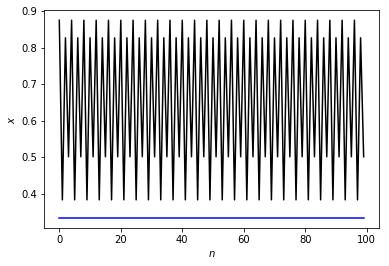

In [55]:
import numpy
from matplotlib import pyplot
%matplotlib inline

x0 = 0.5
N = 2000
sequence1 = logistic(x0, 1.5, N)
sequence2 = logistic(x0, 3.5, N)
pyplot.plot(sequence1[-100:], 'b-', label = r'$r=1.5$')
pyplot.plot(sequence2[-100:], 'k-', label = r'$r=3.5$')
pyplot.xlabel(r'$n$')
pyplot.ylabel(r'$x$')
pyplot.show()

This suggests that, for $r=1.5$, the sequence has settled down to a fixed point. In the $r=3.5$ case it seems to be moving between four points repeatedly.

## Exercise 3

Fix $x_0 = 0.5$. For each value of $r$ between $1$ and $4$, in steps of $0.01$, calculate the first 2,000 members of the sequence. Plot the last 1,000 members of the sequence on a plot where the $x$-axis is the value of $r$ and the $y$-axis is the values in the sequence. Do not plot lines - just plot markers (e.g., use the `'k.'` plotting style).

#### Solution

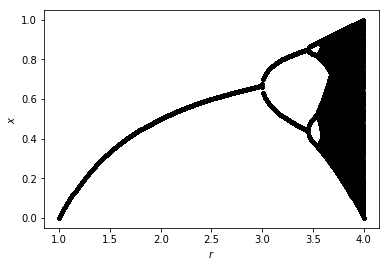

In [56]:
import numpy
from matplotlib import pyplot
%matplotlib inline

# This is the "best" way of doing it, but numpy hasn't been introduced yet
# r_values = numpy.arange(1.0, 4.0, 0.01) 
r_values = []
for i in range(302):
    r_values.append(1.0 + 0.01 * i)
x0 = 0.5
N = 2000
for r in r_values:
    sequence = logistic(x0, r, N)
    pyplot.plot(r*numpy.ones_like(sequence[1000:]), sequence[1000:], 'k.')
pyplot.xlabel(r'$r$')
pyplot.ylabel(r'$x$')
pyplot.show()

## Exercise 4

For iterative maps such as the logistic map, one of three things can occur:

1. The sequence settles down to a *fixed point*.
2. The sequence rotates through a finite number of values. This is called a *limit cycle*.
3. The sequence generates an infinite number of values. This is called *deterministic chaos*.

Using just your plot, or new plots from this data, work out approximate values of $r$ for which there is a transition from fixed points to limit cycles, from limit cycles of a given number of values to more values, and the transition to chaos.

#### Solution

The first transition is at $r \approx 3$, the next at $r \approx 3.45$, the next at $r \approx 3.55$. The transition to chaos appears to happen before $r=4$, but it's not obvious exactly where.

# Mandelbrot

The Mandelbrot set is also generated from a sequence, $\{ z_n \}$, using the relation

\begin{equation}
  z_{n+1} = z_n^2 + c, \qquad z_0 = 0.
\end{equation}

The members of the sequence, and the constant $c$, are all complex. The point in the complex plane at $c$ is in the Mandelbrot set only if the $|z_n| < 2$ for all members of the sequence. In reality, checking the first 100 iterations is sufficient.

Note: the python notation for a complex number $x + \text{i} y$ is `x + yj`: that is, `j` is used to indicate $\sqrt{-1}$. If you know the values of `x` and `y` then `x + yj` constructs a complex number; if they are stored in variables you can use `complex(x, y)`.

## Exercise 1

Write a function that checks if the point $c$ is in the Mandelbrot set.

#### Solution

In [57]:
def in_Mandelbrot(c, n_iterations = 100):
    z0 = 0.0 + 0j
    in_set = True
    n = 0
    zn = z0
    while in_set and (n < n_iterations):
        n += 1
        znew = zn**2 + c
        in_set = abs(znew) < 2.0
        zn = znew
    return in_set

## Exercise 2

Check the points $c=0$ and $c=\pm 2 \pm 2 \text{i}$ and ensure they do what you expect. (What *should* you expect?)

#### Solution

In [58]:
c_values = [0.0, 2+2j, 2-2j, -2+2j, -2-2j]
for c in c_values:
    print("Is {} in the Mandelbrot set? {}.".format(c, in_Mandelbrot(c)))

Is 0.0 in the Mandelbrot set? True.
Is (2+2j) in the Mandelbrot set? False.
Is (2-2j) in the Mandelbrot set? False.
Is (-2+2j) in the Mandelbrot set? False.
Is (-2-2j) in the Mandelbrot set? False.


## Exercise 3

Write a function that, given $N$

1. generates an $N \times N$ grid spanning $c = x + \text{i} y$, for $-2 \le x \le 2$ and $-2 \le y \le 2$;
2. returns an $N\times N$ array containing one if the associated grid point is in the Mandelbrot set, and zero otherwise.

#### Solution

In [59]:
import numpy

def grid_Mandelbrot(N):
    x = numpy.linspace(-2.0, 2.0, N)
    X, Y = numpy.meshgrid(x, x)
    C = X + 1j*Y
    grid = numpy.zeros((N, N), int)
    for nx in range(N):
        for ny in range(N):
            grid[nx, ny] = int(in_Mandelbrot(C[nx, ny]))
    return grid

## Exercise 4

Using the function `imshow` from `matplotlib`, plot the resulting array for a $100 \times 100$ array to make sure you see the expected shape.

#### Solution

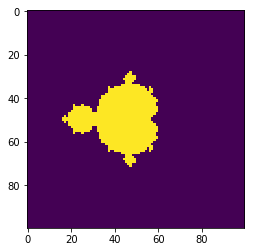

In [60]:
from matplotlib import pyplot
%matplotlib inline

pyplot.imshow(grid_Mandelbrot(100))

## Exercise 5

Modify your functions so that, instead of returning whether a point is inside the set or not, it returns the logarithm of the number of iterations it takes. Plot the result using `imshow` again.

#### Solution

In [61]:
from math import log

def log_Mandelbrot(c, n_iterations = 100):
    z0 = 0.0 + 0j
    in_set = True
    n = 0
    zn = z0
    while in_set and (n < n_iterations):
        n += 1
        znew = zn**2 + c
        in_set = abs(znew) < 2.0
        zn = znew
    return log(n)

def log_grid_Mandelbrot(N):
    x = numpy.linspace(-2.0, 2.0, N)
    X, Y = numpy.meshgrid(x, x)
    C = X + 1j*Y
    grid = numpy.zeros((N, N), int)
    for nx in range(N):
        for ny in range(N):
            grid[nx, ny] = log_Mandelbrot(C[nx, ny])
    return grid

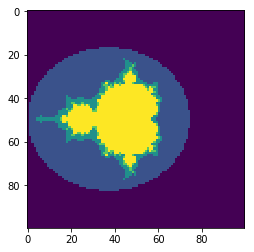

In [62]:
from matplotlib import pyplot
%matplotlib inline

pyplot.imshow(log_grid_Mandelbrot(100))

## Exercise 6

Try some higher resolution plots, and try plotting only a section to see the structure. **Note** this is not a good way to get high accuracy close up images!

#### Solution

This is a simple example:

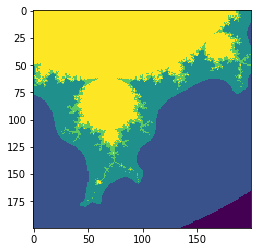

In [63]:
pyplot.imshow(log_grid_Mandelbrot(1000)[600:800,400:600])

# Equivalence classes

An *equivalence class* is a relation that groups objects in a set into related subsets. For example, if we think of the integers modulo $7$, then $1$ is in the same equivalence class as $8$ (and $15$, and $22$, and so on), and $3$ is in the same equivalence class as $10$. We use the tilde $3 \sim 10$ to denote two objects within the same equivalence class.

Here, we are going to define the positive integers programmatically from equivalent sequences.

## Exercise 1

Define a python class `Eqint`. This should be

1. Initialized by a sequence;
2. Store the sequence;
3. Define its representation (via the `__repr__` function) to be the integer length of the sequence;
4. Redefine equality (via the `__eq__` function) so that two `eqint`s are equal if their sequences have same length.

#### Solution

In [64]:
class Eqint(object):
    
    def __init__(self, sequence):
        self.sequence = sequence
        
    def __repr__(self):
        return str(len(self.sequence))
    
    def __eq__(self, other):
        return len(self.sequence)==len(other.sequence)

## Exercise 2

Define a `zero` object from the empty list, and three `one` objects, from a single object list, tuple, and string. For example

```python
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')
```

Check that none of the `one` objects equal the zero object, but all equal the other `one` objects. Print each object to check that the representation gives the integer length.

#### Solution

In [65]:
zero = Eqint([])
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')

print("Is zero equivalent to one? {}, {}, {}".format(zero == one_list, 
                                                     zero == one_tuple,
                                                     zero == one_string))
print("Is one equivalent to one? {}, {}, {}.".format(one_list == one_tuple,
                                                     one_list == one_string,
                                                     one_tuple == one_string))
print(zero)
print(one_list)
print(one_tuple)
print(one_string)

Is zero equivalent to one? False, False, False
Is one equivalent to one? True, True, True.
0
1
1
1


## Exercise 3

Redefine the class by including an `__add__` method that combines the two sequences. That is, if `a` and `b` are `Eqint`s then `a+b` should return an `Eqint` defined from combining `a` and `b`s sequences.

##### Note

Adding two different *types* of sequences (eg, a list to a tuple) does not work, so it is better to either iterate over the sequences, or to convert to a uniform type before adding.

#### Solution

In [66]:
class Eqint(object):
    
    def __init__(self, sequence):
        self.sequence = sequence
        
    def __repr__(self):
        return str(len(self.sequence))
    
    def __eq__(self, other):
        return len(self.sequence)==len(other.sequence)
    
    def __add__(a, b):
        return Eqint(tuple(a.sequence) + tuple(b.sequence))

## Exercise 4

Check your addition function by adding together all your previous `Eqint` objects (which will need re-defining, as the class has been redefined). Print the resulting object to check you get `3`, and also print its internal sequence.

#### Solution

In [67]:
zero = Eqint([])
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')

sum_eqint = zero + one_list + one_tuple + one_string
print("The sum is {}.".format(sum_eqint))
print("The internal sequence is {}.".format(sum_eqint.sequence))

The sum is 3.
The internal sequence is (1, 1, '1').


## Exercise 5

We will sketch a construction of the positive integers from *nothing*.

1. Define an empty list `positive_integers`.
2. Define an `Eqint` called `zero` from the empty list. Append it to `positive_integers`.
3. Define an `Eqint` called `next_integer` from the `Eqint` defined by *a copy of* `positive_integers` (ie, use `Eqint(list(positive_integers))`. Append it to `positive_integers`.
4. Repeat step 3 as often as needed.

Use this procedure to define the `Eqint` equivalent to $10$. Print it, and its internal sequence, to check.

#### Solution

In [68]:
positive_integers = []
zero = Eqint([])
positive_integers.append(zero)

N = 10
for n in range(1,N+1):
    positive_integers.append(Eqint(list(positive_integers)))
    
print("The 'final' Eqint is {}".format(positive_integers[-1]))
print("Its sequence is {}".format(positive_integers[-1].sequence))
print("That is, it contains all Eqints with length less than 10.")

The 'final' Eqint is 10
Its sequence is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
That is, it contains all Eqints with length less than 10.


# Rational numbers

Instead of working with floating point numbers, which are not "exact", we could work with the rational numbers $\mathbb{Q}$. A rational number $q \in \mathbb{Q}$ is defined by the *numerator* $n$ and *denominator* $d$ as $q = \frac{n}{d}$, where $n$ and $d$ are *coprime* (ie, have no common divisor other than $1$).

## Exercise 1

Find a python function that finds the greatest common divisor (`gcd`) of two numbers. Use this to write a function `normal_form` that takes a numerator and divisor and returns the coprime $n$ and $d$. Test this function on $q = \frac{3}{2}$, $q = \frac{15}{3}$, and $q = \frac{20}{42}$.

#### Solution

In [69]:
def normal_form(numerator, denominator):
    from fractions import gcd
    
    factor = gcd(numerator, denominator)
    return numerator//factor, denominator//factor

In [70]:
print(normal_form(3, 2))
print(normal_form(15, 3))
print(normal_form(20, 42))

(3, 2)
(5, 1)
(10, 21)


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 2

Define a class `Rational` that uses the `normal_form` function to store the rational number in the appropriate form. Define a `__repr__` function that prints a string that *looks like* $\frac{n}{d}$ (**hint**: use `len(str(number))` to find the number of digits of an integer). Test it on the cases above.

#### Solution

In [71]:
class Rational(object):
    """
    A rational number.
    """
    
    def __init__(self, numerator, denominator):
        
        n, d = normal_form(numerator, denominator)
        
        self.numerator = n
        self.denominator = d
        
        return None
    
    def __repr__(self):
        
        max_length = max(len(str(self.numerator)), len(str(self.denominator)))
        
        if self.denominator == 1:
            frac = str(self.numerator)
        else:
            numerator = str(self.numerator)+'\n'
            bar = max_length*'-'+'\n'
            denominator = str(self.denominator)
            frac = numerator+bar+denominator
        
        return frac

In [72]:
q1 = Rational(3, 2)
print(q1)
q2 = Rational(15, 3)
print(q2)
q3 = Rational(20, 42)
print(q3)

3
-
2
5
10
--
21


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 3

Overload the `__add__` function so that you can add two rational numbers. Test it on $\frac{1}{2} + \frac{1}{3} + \frac{1}{6} = 1$.

#### Solution

In [73]:
class Rational(object):
    """
    A rational number.
    """
    
    def __init__(self, numerator, denominator):
        
        n, d = normal_form(numerator, denominator)
        
        self.numerator = n
        self.denominator = d
        
        return None
    
    def __add__(a, b):
        
        numerator = a.numerator * b.denominator + b.numerator * a.denominator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __repr__(self):
        
        max_length = max(len(str(self.numerator)), len(str(self.denominator)))
        
        if self.denominator == 1:
            frac = str(self.numerator)
        else:
            numerator = str(self.numerator)+'\n'
            bar = max_length*'-'+'\n'
            denominator = str(self.denominator)
            frac = numerator+bar+denominator
        
        return frac

In [74]:
print(Rational(1,2) + Rational(1,3) + Rational(1,6))

1


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 4

Overload the `__mul__` function so that you can multiply two rational numbers. Test it on $\frac{1}{3} \times \frac{15}{2} \times \frac{2}{5} = 1$.

#### Solution

In [75]:
class Rational(object):
    """
    A rational number.
    """
    
    def __init__(self, numerator, denominator):
        
        n, d = normal_form(numerator, denominator)
        
        self.numerator = n
        self.denominator = d
        
        return None
    
    def __add__(a, b):
        
        numerator = a.numerator * b.denominator + b.numerator * a.denominator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __mul__(a, b):
        
        numerator = a.numerator * b.numerator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __repr__(self):
        
        max_length = max(len(str(self.numerator)), len(str(self.denominator)))
        
        if self.denominator == 1:
            frac = str(self.numerator)
        else:
            numerator = str(self.numerator)+'\n'
            bar = max_length*'-'+'\n'
            denominator = str(self.denominator)
            frac = numerator+bar+denominator
        
        return frac

In [76]:
print(Rational(1,3)*Rational(15,2)*Rational(2,5))

1


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 5

Overload the [`__rmul__`](https://docs.python.org/2/reference/datamodel.html?highlight=rmul#object.__rmul__) function so that you can multiply a rational by an *integer*. Check that $\frac{1}{2} \times 2 = 1$ and $\frac{1}{2} + (-1) \times \frac{1}{2} = 0$. Also overload the `__sub__` function (using previous functions!) so that you can subtract rational numbers and check that $\frac{1}{2} - \frac{1}{2} = 0$.

#### Solution

In [77]:
class Rational(object):
    """
    A rational number.
    """
    
    def __init__(self, numerator, denominator):
        
        n, d = normal_form(numerator, denominator)
        
        self.numerator = n
        self.denominator = d
        
        return None
    
    def __add__(a, b):
        
        numerator = a.numerator * b.denominator + b.numerator * a.denominator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __mul__(a, b):
        
        numerator = a.numerator * b.numerator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __rmul__(self, other):
        
        numerator = self.numerator * other
        return Rational(numerator, self.denominator)
    
    def __sub__(a, b):
        
        return a + (-1)*b
    
    def __repr__(self):
        
        max_length = max(len(str(self.numerator)), len(str(self.denominator)))
        
        if self.denominator == 1:
            frac = str(self.numerator)
        else:
            numerator = str(self.numerator)+'\n'
            bar = max_length*'-'+'\n'
            denominator = str(self.denominator)
            frac = numerator+bar+denominator
        
        return frac

In [78]:
half = Rational(1,2)
print(2*half)
print(half+(-1)*half)
print(half-half)

1
0
0


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 6

Overload the `__float__` function so that `float(q)` returns the floating point approximation to the rational number `q`. Test this on $\frac{1}{2}, \frac{1}{3}$, and $\frac{1}{11}$.

#### Solution

In [79]:
class Rational(object):
    """
    A rational number.
    """
    
    def __init__(self, numerator, denominator):
        
        n, d = normal_form(numerator, denominator)
        
        self.numerator = n
        self.denominator = d
        
        return None
    
    def __add__(a, b):
        
        numerator = a.numerator * b.denominator + b.numerator * a.denominator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __mul__(a, b):
        
        numerator = a.numerator * b.numerator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __rmul__(self, other):
        
        numerator = self.numerator * other
        return Rational(numerator, self.denominator)
    
    def __sub__(a, b):
        
        return a + (-1)*b
    
    def __float__(a):
        
        return float(a.numerator) / float(a.denominator)
    
    def __repr__(self):
        
        max_length = max(len(str(self.numerator)), len(str(self.denominator)))
        
        if self.denominator == 1:
            frac = str(self.numerator)
        else:
            numerator = str(self.numerator)+'\n'
            bar = max_length*'-'+'\n'
            denominator = str(self.denominator)
            frac = numerator+bar+denominator
        
        return frac

In [80]:
print(float(Rational(1,2)))
print(float(Rational(1,3)))
print(float(Rational(1,11)))

0.5
0.3333333333333333
0.09090909090909091


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 7

Overload the `__lt__` function to compare two rational numbers. Create a list of rational numbers where the denominator is $n = 2, \dots, 11$ and the numerator is the floored integer $n/2$, ie `n//2`. Use the `sorted` function on that list (which relies on the `__lt__` function).

#### Solution

In [81]:
class Rational(object):
    """
    A rational number.
    """
    
    def __init__(self, numerator, denominator):
        
        n, d = normal_form(numerator, denominator)
        
        self.numerator = n
        self.denominator = d
        
        return None
    
    def __add__(a, b):
        
        numerator = a.numerator * b.denominator + b.numerator * a.denominator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __mul__(a, b):
        
        numerator = a.numerator * b.numerator
        denominator = a.denominator * b.denominator
        return Rational(numerator, denominator)
    
    def __rmul__(self, other):
        
        numerator = self.numerator * other
        return Rational(numerator, self.denominator)
    
    def __sub__(a, b):
        
        return a + (-1)*b
    
    def __float__(a):
        
        return float(a.numerator) / float(a.denominator)
    
    def __lt__(a, b):
        
        return a.numerator * b.denominator < a.denominator * b.numerator
    
    def __repr__(self):
        
        max_length = max(len(str(self.numerator)), len(str(self.denominator)))
        
        if self.denominator == 1:
            frac = str(self.numerator)
        else:
            numerator = '\n'+str(self.numerator)+'\n'
            bar = max_length*'-'+'\n'
            denominator = str(self.denominator)
            frac = numerator+bar+denominator
        
        return frac

In [82]:
q_list = [Rational(n//2, n) for n in range(2, 12)]
print(sorted(q_list))

[
1
-
3, 
2
-
5, 
3
-
7, 
4
-
9, 
5
--
11, 
1
-
2, 
1
-
2, 
1
-
2, 
1
-
2, 
1
-
2]


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


## Exercise 8

The [Wallis formula for $\pi$](http://mathworld.wolfram.com/WallisFormula.html) is

\begin{equation}
  \pi = 2 \prod_{n=1}^{\infty} \frac{ (2 n)^2 }{(2 n - 1) (2 n + 1)}.
\end{equation}

We can define a partial product $\pi_N$ as

\begin{equation}
  \pi_N = 2 \prod_{n=1}^{N} \frac{ (2 n)^2 }{(2 n - 1) (2 n + 1)},
\end{equation}

each of which are rational numbers.

Construct a list of the first 20 rational number approximations to $\pi$ and print them out. Print the sorted list to show that the approximations are always increasing. Then convert them to floating point numbers, construct a `numpy` array, and subtract this array from $\pi$ to see how accurate they are.

#### Solution

In [83]:
def wallis_rational(N):
    """
    The partial product approximation to pi using the first N terms of Wallis' formula.
    
    Parameters
    ----------
    
    N : int
        Number of terms in product
        
    Returns
    -------
    
    partial : Rational
        A rational number approximation to pi
    """
    
    partial = Rational(2,1)
    for n in range(1, N+1):
        partial = partial * Rational((2*n)**2, (2*n-1)*(2*n+1))
    return partial

In [84]:
pi_list = [wallis_rational(n) for n in range(1, 21)]
print(pi_list)
print(sorted(pi_list))

[
8
-
3, 
128
---
45, 
512
---
175, 
32768
-----
11025, 
131072
------
43659, 
2097152
-------
693693, 
8388608
-------
2760615, 
2147483648
----------
703956825, 
8589934592
----------
2807136475, 
137438953472
------------
44801898141, 
549755813888
------------
178837328943, 
35184372088832
--------------
11425718238025, 
140737488355328
---------------
45635265151875, 
2251799813685248
----------------
729232910488125, 
9007199254740992
----------------
2913690606794775, 
9223372036854775808
-------------------
2980705490751054825, 
36893488147419103232
--------------------
11912508103174630875, 
590295810358705651712
---------------------
190453061649520333125, 
2361183241434822606848
----------------------
761284675790187924375, 
151115727451828646838272
------------------------
48691767863540419643025]
[
8
-
3, 
128
---
45, 
512
---
175, 
32768
-----
11025, 
131072
------
43659, 
2097152
-------
693693, 
8388608
-------
2760615, 
2147483648
----------
703956825, 
8589934592
----

/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


In [85]:
import numpy
print(numpy.pi-numpy.array(list(map(float, pi_list))))

[0.47492599 0.29714821 0.21587837 0.16943846 0.1394167  0.11842246
 0.10291902 0.09100266 0.08155811 0.07388885 0.06753749 0.06219131
 0.05762923 0.05369058 0.05025576 0.04723393 0.04455483 0.0421633
 0.04001539 0.03807569]


# The shortest published Mathematical paper

A [candidate for the shortest mathematical paper ever](http://www.ams.org/journals/bull/1966-72-06/S0002-9904-1966-11654-3/S0002-9904-1966-11654-3.pdf) shows the following result:

\begin{equation}
  27^5 + 84^5 + 110^5 + 133^5 = 144^5.
\end{equation}

This is interesting as

> This is a counterexample to a conjecture by Euler ... that at least $n$ $n$th powers are required to sum to an $n$th power, $n > 2$.

## Exercise 1

Using python, check the equation above is true.

#### Solution

In [86]:
lhs = 27**5 + 84**5 + 110**5 + 133**5
rhs = 144**5

print("Does the LHS {} equal the RHS {}? {}".format(lhs, rhs, lhs==rhs))

Does the LHS 61917364224 equal the RHS 61917364224? True


## Exercise 2

The more interesting statement in the paper is that

\begin{equation}
  27^5 + 84^5 + 110^5 + 133^5 = 144^5.
\end{equation}

> [is] the smallest instance in which four fifth powers sum to a fifth power.

Interpreting "the smallest instance" to mean the solution where the right hand side term (the largest integer) is the smallest, we want to use python to check this statement.

You may find the `combinations` function from the `itertools` package useful.

In [87]:
import numpy
import itertools

The `combinations` function returns all the combinations (ignoring order) of `r` elements from a given list. For example, take a list of length 6, `[1, 2, 3, 4, 5, 6]` and compute all the combinations of length 4:

In [88]:
input_list = numpy.arange(1, 7)
combinations = list(itertools.combinations(input_list, 4))
print(combinations)

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 5, 6), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 5, 6), (1, 4, 5, 6), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 5, 6), (2, 4, 5, 6), (3, 4, 5, 6)]


We can already see that the number of terms to consider is large.

Note that we have used the `list` function to explicitly get a list of the combinations. The `combinations` function returns a *generator*, which can be used in a loop as if it were a list, without storing all elements of the list.

How fast does the number of combinations grow? The standard formula says that for a list of length $n$ there are

\begin{equation}
  \begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k! (n-k)!}
\end{equation}

combinations of length $k$. For $k=4$ as needed here we will have $n (n-1) (n-2) (n-3) / 24$ combinations. For $n=144$ we therefore have

In [89]:
n_combinations = 144*143*142*141/24
print("Number of combinations of 4 objects from 144 is {}".format(n_combinations))

Number of combinations of 4 objects from 144 is 17178876.0


### Exercise 2a

Show, by getting python to compute the number of combinations $N = \begin{pmatrix} n \\ 4 \end{pmatrix}$ that $N$ grows roughly as $n^4$. To do this, plot the number of combinations and $n^4$ on a log-log scale. Restrict to $n \le 50$.

#### Solution

In [90]:
from matplotlib import pyplot
%matplotlib inline

In [91]:
n = numpy.arange(5, 51)
N = numpy.zeros_like(n)
for i, n_c in enumerate(n):
    combinations = list(itertools.combinations(numpy.arange(1,n_c+1), 4))
    N[i] = len(combinations)

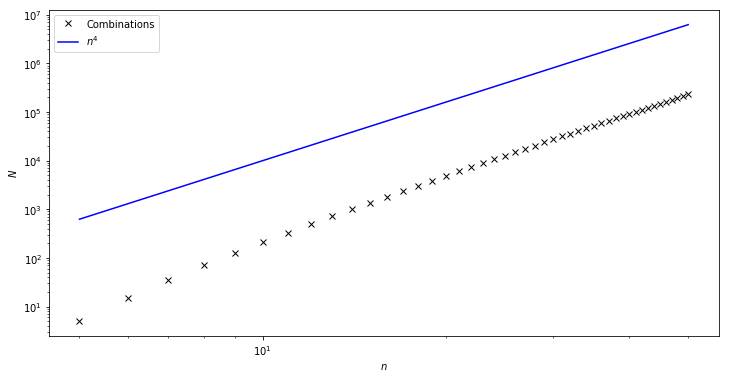

In [92]:
pyplot.figure(figsize=(12,6))
pyplot.loglog(n, N, linestyle='None', marker='x', color='k', label='Combinations')
pyplot.loglog(n, n**4, color='b', label=r'$n^4$')
pyplot.xlabel(r'$n$')
pyplot.ylabel(r'$N$')
pyplot.legend(loc='upper left')
pyplot.show()

With 17 million combinations to work with, we'll need to be a little careful how we compute.

One thing we could try is to loop through each possible "smallest instance" (the term on the right hand side) in increasing order. We then check all possible combinations of left hand sides.

This is computationally *very expensive* as we repeat a lot of calculations. We repeatedly recalculate combinations (a bad idea). We repeatedly recalculate the powers of the same number.

Instead, let us try creating the list of all combinations of powers once.

### Exercise 2b

1. Construct a `numpy` array containing all integers in $1, \dots, 144$ to the fifth power. 
2. Construct a list of all combinations of four elements from this array.
3. Construct a list of sums of all these combinations.
4. Loop over one list and check if the entry appears in the other list (ie, use the `in` keyword).

#### Solution

In [4]:
import numpy as np
import itertools

In [5]:

nmax=145
range_to_power = np.arange(1, nmax)**5.0
lhs_combinations = list(itertools.combinations(range_to_power, 4))

Then calculate the sums:

In [6]:
lhs_sums = []
for lhs_terms in lhs_combinations:
    lhs_sums.append(np.sum(np.array(lhs_terms)))

KeyboardInterrupt: 

Finally, loop through the sums and check to see if it matches any possible term on the RHS:

In [ ]:
for i, lhs in enumerate(lhs_sums):
    if lhs in range_to_power:
        rhs_primitive = int(lhs**(0.2))
        lhs_primitive = (numpy.array(lhs_combinations[i])**(0.2)).astype(int)
        print("The LHS terms are {}.".format(lhs_primitive))
        print("The RHS term is {}.".format(rhs_primitive))

# Lorenz attractor

The Lorenz system is a set of ordinary differential equations which can be written

\begin{equation}
  \frac{\text{d} \vec{v}}{\text{d} \vec{t}} = \vec{f}(\vec{v})
\end{equation}

where the variables in the state vector $\vec{v}$ are

\begin{equation}
  \vec{v} = \begin{pmatrix} x(t) \\ y(t) \\ z(t) \end{pmatrix}
\end{equation}

and the function defining the ODE is

\begin{equation}
  \vec{f} = \begin{pmatrix} \sigma \left( y(t) - x(t) \right) \\ x(t) \left( \rho - z(t) \right) - y(t) \\ x(t) y(t) - \beta z(t) \end{pmatrix}.
\end{equation}

The parameters $\sigma, \rho, \beta$ are all real numbers.

## Exercise 1

Write a function `dvdt(v, t, params)` that returns $\vec{f}$ given $\vec{v}, t$ and the parameters $\sigma, \rho, \beta$.

#### Solution

In [1]:
def dvdt(v, t, sigma, rho, beta):
    """
    Define the Lorenz system.
    
    Parameters
    ----------
    
    v : list
        State vector
    t : float
        Time
    sigma : float
        Parameter
    rho : float
        Parameter
    beta : float
        Parameter
    
    Returns
    -------
    
    dvdt : list
        RHS defining the Lorenz system
    """
    
    x, y, z = v
    
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

## Exercise 2

Fix $\sigma=10, \beta=8/3$. Set initial data to be $\vec{v}(0) = \vec{1}$. Using `scipy`, specifically the `odeint` function of `scipy.integrate`, solve the Lorenz system up to $t=100$ for $\rho=13, 14, 15$ and $28$.

Plot your results in 3d, plotting $x, y, z$.

#### Solution

In [2]:
import numpy
from scipy.integrate import odeint

In [3]:
v0 = [1.0, 1.0, 1.0]
sigma = 10.0
beta = 8.0/3.0
t_values = numpy.linspace(0.0, 100.0, 5000)
rho_values = [13.0, 14.0, 15.0, 28.0]
v_values = []
for rho in rho_values:
    params = (sigma, rho, beta)
    v = odeint(dvdt, v0, t_values, args=params)
    v_values.append(v)

In [4]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D

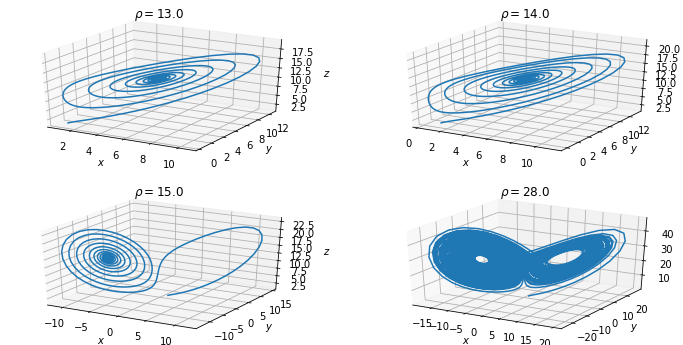

In [5]:
fig = pyplot.figure(figsize=(12,6))
for i, v in enumerate(v_values):
    ax = fig.add_subplot(2,2,i+1,projection='3d')
    ax.plot(v[:,0], v[:,1], v[:,2])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    ax.set_title(r"$\rho={}$".format(rho_values[i]))
pyplot.show()

## Exercise 3

Fix $\rho = 28$. Solve the Lorenz system twice, up to $t=40$, using the two different initial conditions $\vec{v}(0) = \vec{1}$ and $\vec{v}(0) = \vec{1} + \vec{10^{-5}}$.

Show four plots. Each plot should show the two solutions on the same axes, plotting $x, y$ and $z$. Each plot should show $10$ units of time, ie the first shows $t \in [0, 10]$, the second shows $t \in [10, 20]$, and so on.

#### Solution

In [6]:
t_values = numpy.linspace(0.0, 40.0, 4000)
rho = 28.0
params = (sigma, rho, beta)
v_values = []
v0_values = [[1.0,1.0,1.0],
             [1.0+1e-5,1.0+1e-5,1.0+1e-5]]
for v0 in v0_values:
    v = odeint(dvdt, v0, t_values, args=params)
    v_values.append(v)

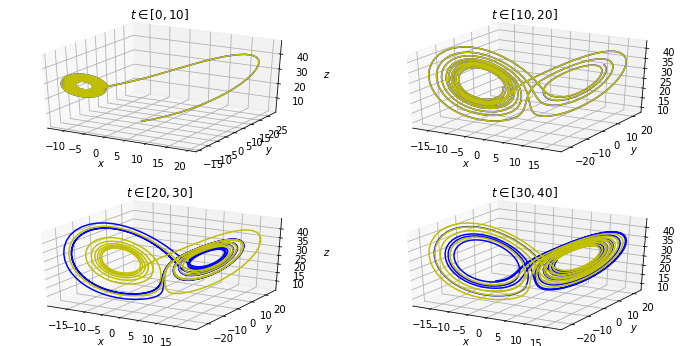

In [7]:
fig = pyplot.figure(figsize=(12,6))
line_colours = 'by'
for tstart in range(4):
    ax = fig.add_subplot(2,2,tstart+1,projection='3d')
    for i, v in enumerate(v_values):
        ax.plot(v[tstart*1000:(tstart+1)*1000,0], 
                v[tstart*1000:(tstart+1)*1000,1], 
                v[tstart*1000:(tstart+1)*1000,2], 
                color=line_colours[i])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    ax.set_title(r"$t \in [{},{}]$".format(tstart*10, (tstart+1)*10))
pyplot.show()

This shows the *sensitive dependence on initial conditions* that is characteristic of chaotic behaviour.

# Systematic ODE solving with sympy

We are interested in the solution of

\begin{equation}
  \frac{\text{d} y}{\text{d} t} = e^{-t} - y^n, \qquad y(0) = 1,
\end{equation}

where $n > 1$ is an integer. The "minor" change from the above examples mean that `sympy` can only give the solution as a power series.

## Exercise 1

Compute the general solution as a power series for $n = 2$.

#### Solution

In [16]:
import sympy
sympy.init_printing()

In [17]:
y, t = sympy.symbols('y, t')

In [18]:
sympy.dsolve(sympy.diff(y(t), t) + y(t)**2 - sympy.exp(-t), y(t))

TypeError: 'Symbol' object is not callable

## Exercise 2

Investigate the help for the `dsolve` function to straightforwardly impose the initial condition $y(0) = 1$ using the `ics` argument. Using this, compute the specific solutions that satisfy the ODE for $n = 2, \dots, 10$.

#### Solution

In [19]:
for n in range(2, 11):
    ode_solution = sympy.dsolve(sympy.diff(y(t), t) + y(t)**n - sympy.exp(-t), y(t), 
                                ics = {y(0) : 1})
    print(ode_solution)

TypeError: 'Symbol' object is not callable

## Exercise 3

Using the `removeO` command, plot each of these solutions for $t \in [0, 1]$.

In [20]:
%matplotlib inline

for n in range(2, 11):
    ode_solution = sympy.dsolve(sympy.diff(y(t), t) + y(t)**n - sympy.exp(-t), y(t), 
                                ics = {y(0) : 1})
    sympy.plot(ode_solution.rhs.removeO(), (t, 0, 1));

TypeError: 'Symbol' object is not callable

# Twin primes

A *twin prime* is a pair $(p_1, p_2)$ such that both $p_1$ and $p_2$ are prime and $p_2 = p_1 + 2$.

## Exercise 1

Write a generator that returns twin primes. You can use the generators above, and may want to look at the [itertools](https://docs.python.org/3/library/itertools.html) module together with [its recipes](https://docs.python.org/3/library/itertools.html#itertools-recipes), particularly the `pairwise` recipe.

#### Solution

Note: we need to first pull in the generators introduced in that notebook

In [21]:
def all_primes(N):
    """
    Return all primes less than or equal to N.
    
    Parameters
    ----------
    
    N : int
        Maximum number
        
    Returns
    -------
    
    prime : generator
        Prime numbers
    """
    
    primes = []
    for n in range(2, N+1):
        is_n_prime = True
        for p in primes:
            if n%p == 0:
                is_n_prime = False
                break
        if is_n_prime:
            primes.append(n)
            yield n

Now we can generate pairs using the pairwise recipe:

In [22]:
from itertools import tee

def pair_primes(N):
    "Generate consecutive prime pairs, using the itertools recipe"
    a, b = tee(all_primes(N))
    next(b, None)
    return zip(a, b)

We could examine the results of the two primes directly. But an efficient solution is to use python's [filter function](https://docs.python.org/3/library/functions.html#filter). To do this, first define a function checking if the pair are *twin* primes:

In [23]:
def check_twin(pair):
    """
    Take in a pair of integers, check if they differ by 2.
    """
    p1, p2 = pair
    return p2-p1 == 2

Then use the `filter` function to define another generator:

In [24]:
def twin_primes(N):
    """
    Return all twin primes
    """
    return filter(check_twin, pair_primes(N))

Now check by finding the twin primes with $N<20$:

In [25]:
for tp in twin_primes(20):
    print(tp)

(3, 5)
(5, 7)
(11, 13)
(17, 19)


## Exercise 2

Find how many twin primes there are with $p_2 < 1000$.

#### Solution

Again there are many solutions, but the itertools recipes has the `quantify` pattern. Looking ahead to exercise 3 we'll define:

In [26]:
def pi_N(N):
    """
    Use the quantify pattern from itertools to count the number of twin primes.
    """
    return sum(map(check_twin, pair_primes(N)))

In [27]:
pi_N(1000)

## Exercise 3

Let $\pi_N$ be the number of twin primes such that $p_2 < N$. Plot how $\pi_N / N$ varies with $N$ for $N=2^k$ and $k = 4, 5, \dots 16$. (You should use a logarithmic scale where appropriate!)

#### Solution

We've now done all the hard work and can use the solutions above.

In [28]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [29]:
N = numpy.array([2**k for k in range(4, 17)])
twin_prime_fraction = numpy.array(list(map(pi_N, N))) / N

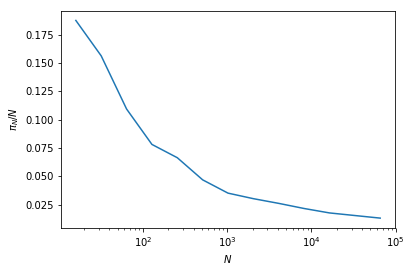

In [30]:
pyplot.semilogx(N, twin_prime_fraction)
pyplot.xlabel(r"$N$")
pyplot.ylabel(r"$\pi_N / N$")
pyplot.show()

For those that have checked Wikipedia, you'll see [Brun's theorem](https://en.wikipedia.org/wiki/Twin_prime#Brun.27s_theorem) which suggests a specific scaling, that $\pi_N$ is bounded by $C N / \log(N)^2$. Checking this numerically on this data:

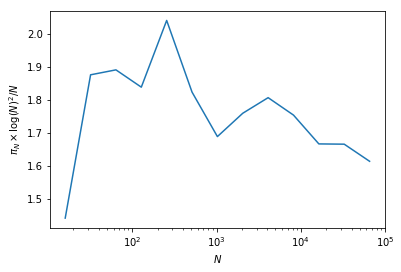

In [31]:
pyplot.semilogx(N, twin_prime_fraction * numpy.log(N)**2)
pyplot.xlabel(r"$N$")
pyplot.ylabel(r"$\pi_N \times \log(N)^2 / N$")
pyplot.show()

# A basis for the polynomials

In the section on classes we defined a `Monomial` class to represent a polynomial with leading coefficient $1$. As the $N+1$ monomials $1, x, x^2, \dots, x^N$ form a basis for the vector space of polynomials of order $N$, $\mathbb{P}^N$, we can use the `Monomial` class to return this basis.

## Exercise 1

Define a generator that will iterate through this basis of $\mathbb{P}^N$ and test it on $\mathbb{P}^3$.

#### Solution

Again we first take the definition of the crucial class from the notes.

In [32]:
class Polynomial(object):
    """Representing a polynomial."""
    explanation = "I am a polynomial"
    
    def __init__(self, roots, leading_term):
        self.roots = roots
        self.leading_term = leading_term
        self.order = len(roots)
        
    def __repr__(self):
        string = str(self.leading_term)
        for root in self.roots:
            if root == 0:
                string = string + "x"
            elif root > 0:
                string = string + "(x - {})".format(root)
            else:
                string = string + "(x + {})".format(-root)
        return string
    
    def __mul__(self, other):
        roots = self.roots + other.roots
        leading_term = self.leading_term * other.leading_term
        return Polynomial(roots, leading_term)
    
    def explain_to(self, caller):
        print("Hello, {}. {}.".format(caller,self.explanation))
        print("My roots are {}.".format(self.roots))
        return None

In [33]:
class Monomial(Polynomial):
    """Representing a monomial, which is a polynomial with leading term 1."""
    explanation = "I am a monomial"
    
    def __init__(self, roots):
        Polynomial.__init__(self, roots, 1)
        
    def __repr__(self):
        string = ""
        for root in self.roots:
            if root == 0:
                string = string + "x"
            elif root > 0:
                string = string + "(x - {})".format(root)
            else:
                string = string + "(x + {})".format(-root)
        return string

Now we can define the first basis:

In [34]:
def basis_pN(N):
    """
    A generator for the simplest basis of P^N.
    """
    
    for n in range(N+1):
        yield Monomial(n*[0])

Then test it on $\mathbb{P}^N$:

In [35]:
for poly in basis_pN(3):
    print(poly)


x
xx
xxx


This looks horrible, but is correct. To really make this look good, we need to improve the output. If we use

In [36]:
class Monomial(Polynomial):
    """Representing a monomial, which is a polynomial with leading term 1."""
    explanation = "I am a monomial"
    
    def __init__(self, roots):
        Polynomial.__init__(self, roots, 1)
        
    def __repr__(self):
        if len(self.roots):
            string = ""
            n_zero_roots = len(self.roots) - numpy.count_nonzero(self.roots)
            if n_zero_roots == 1:
                string = "x"
            elif n_zero_roots > 1:
                string = "x^{}".format(n_zero_roots)
        else: # Monomial degree 0.
            string = "1"
        for root in self.roots:
            if root > 0:
                string = string + "(x - {})".format(root)
            elif root < 0:
                string = string + "(x + {})".format(-root)
        return string

then we can deal with the uglier cases, and re-running the test we get

In [37]:
for poly in basis_pN(3):
    print(poly)

1
x
x^2
x^3


An even better solution would be to use the `numpy.unique` function as in [this stackoverflow answer](http://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array) (the second one!) to get the frequency of all the roots.

## Exercise 2

An alternative basis is given by the monomials

\begin{align}
  p_0(x) &= 1, \\ p_1(x) &= 1-x, \\ p_2(x) &= (1-x)(2-x), \\ \dots & \quad \dots, \\ p_N(x) &= \prod_{n=1}^N (n-x).
\end{align}

Define a generator that will iterate through this basis of $\mathbb{P}^N$ and test it on $\mathbb{P}^4$.

#### Solution

In [38]:
def basis_pN_variant(N):
    """
    A generator for the 'sum' basis of P^N.
    """
    
    for n in range(N+1):
        yield Monomial(range(n+1))

In [39]:
for poly in basis_pN_variant(4):
    print(poly)

x
x(x - 1)
x(x - 1)(x - 2)
x(x - 1)(x - 2)(x - 3)
x(x - 1)(x - 2)(x - 3)(x - 4)


I am too lazy to work back through the definitions and flip all the signs; it should be clear how to do this!

## Exercise 3

Use these generators to write another generator that produces a basis of $\mathbb{P^3} \times \mathbb{P^4}$.

#### Solution

Hopefully by now you'll be aware of how useful `itertools` is!

In [40]:
from itertools import product

In [41]:
def basis_product():
    """
    Basis of the product space
    """
    yield from product(basis_pN(3), basis_pN_variant(4))

In [42]:
for p1, p2 in basis_product():
    print("Basis element is ({}) X ({}).".format(p1, p2))

Basis element is (1) X (x).
Basis element is (1) X (x(x - 1)).
Basis element is (1) X (x(x - 1)(x - 2)).
Basis element is (1) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (1) X (x(x - 1)(x - 2)(x - 3)(x - 4)).
Basis element is (x) X (x).
Basis element is (x) X (x(x - 1)).
Basis element is (x) X (x(x - 1)(x - 2)).
Basis element is (x) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (x) X (x(x - 1)(x - 2)(x - 3)(x - 4)).
Basis element is (x^2) X (x).
Basis element is (x^2) X (x(x - 1)).
Basis element is (x^2) X (x(x - 1)(x - 2)).
Basis element is (x^2) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (x^2) X (x(x - 1)(x - 2)(x - 3)(x - 4)).
Basis element is (x^3) X (x).
Basis element is (x^3) X (x(x - 1)).
Basis element is (x^3) X (x(x - 1)(x - 2)).
Basis element is (x^3) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (x^3) X (x(x - 1)(x - 2)(x - 3)(x - 4)).


I've cheated here as I haven't introduced the `yield from` syntax (which returns an iterator from a generator). We could write this out instead as

In [43]:
def basis_product_long_form():
    """
    Basis of the product space (without using yield_from)
    """
    prod = product(basis_pN(3), basis_pN_variant(4))
    yield next(prod)

In [44]:
for p1, p2 in basis_product():
    print("Basis element is ({}) X ({}).".format(p1, p2))

Basis element is (1) X (x).
Basis element is (1) X (x(x - 1)).
Basis element is (1) X (x(x - 1)(x - 2)).
Basis element is (1) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (1) X (x(x - 1)(x - 2)(x - 3)(x - 4)).
Basis element is (x) X (x).
Basis element is (x) X (x(x - 1)).
Basis element is (x) X (x(x - 1)(x - 2)).
Basis element is (x) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (x) X (x(x - 1)(x - 2)(x - 3)(x - 4)).
Basis element is (x^2) X (x).
Basis element is (x^2) X (x(x - 1)).
Basis element is (x^2) X (x(x - 1)(x - 2)).
Basis element is (x^2) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (x^2) X (x(x - 1)(x - 2)(x - 3)(x - 4)).
Basis element is (x^3) X (x).
Basis element is (x^3) X (x(x - 1)).
Basis element is (x^3) X (x(x - 1)(x - 2)).
Basis element is (x^3) X (x(x - 1)(x - 2)(x - 3)).
Basis element is (x^3) X (x(x - 1)(x - 2)(x - 3)(x - 4)).


# Anscombe's quartet

Four separate datasets are given:

| x    | y     | x    | y    | x    | y     | x    | y     |
|------|-------|------|------|------|-------|------|-------|
| 10.0 | 8.04  | 10.0 | 9.14 | 10.0 | 7.46  | 8.0  | 6.58  |
| 8.0  | 6.95  | 8.0  | 8.14 | 8.0  | 6.77  | 8.0  | 5.76  |
| 13.0 | 7.58  | 13.0 | 8.74 | 13.0 | 12.74 | 8.0  | 7.71  |
| 9.0  | 8.81  | 9.0  | 8.77 | 9.0  | 7.11  | 8.0  | 8.84  |
| 11.0 | 8.33  | 11.0 | 9.26 | 11.0 | 7.81  | 8.0  | 8.47  |
| 14.0 | 9.96  | 14.0 | 8.10 | 14.0 | 8.84  | 8.0  | 7.04  |
| 6.0  | 7.24  | 6.0  | 6.13 | 6.0  | 6.08  | 8.0  | 5.25  |
| 4.0  | 4.26  | 4.0  | 3.10 | 4.0  | 5.39  | 19.0 | 12.50 |
| 12.0 | 10.84 | 12.0 | 9.13 | 12.0 | 8.15  | 8.0  | 5.56  |
| 7.0  | 4.82  | 7.0  | 7.26 | 7.0  | 6.42  | 8.0  | 7.91  |
| 5.0  | 5.68  | 5.0  | 4.74 | 5.0  | 5.73  | 8.0  | 6.89  |

## Exercise 1

Using standard `numpy` operations, show that each dataset has the same mean and standard deviation, to two decimal places.

#### Solution

In [45]:
import numpy

In [46]:
set1_x = numpy.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
set1_y = numpy.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
set2_x = numpy.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
set2_y = numpy.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
set3_x = numpy.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
set3_y = numpy.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
set4_x = numpy.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
set4_y = numpy.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

data_x = set1_x, set2_x, set3_x, set4_x
data_y = set1_y, set2_y, set3_y, set4_y

In [47]:
print("Results for x:")
for x in data_x:
    print("Mean: {:.2f}. Variance {:.2f}. Standard deviation {:.2f}.".format(numpy.mean(x),
                                                                            numpy.var(x),
                                                                            numpy.std(x)))
print("Results for y:")
for data in data_y:
    print("Mean: {:.2f}. Variance {:.2f}. Standard deviation {:.2f}.".format(numpy.mean(data),
                                                                             numpy.var(data),
                                                                             numpy.std(data)))

Results for x:
Mean: 9.00. Variance 10.00. Standard deviation 3.16.
Mean: 9.00. Variance 10.00. Standard deviation 3.16.
Mean: 9.00. Variance 10.00. Standard deviation 3.16.
Mean: 9.00. Variance 10.00. Standard deviation 3.16.
Results for y:
Mean: 7.50. Variance 3.75. Standard deviation 1.94.
Mean: 7.50. Variance 3.75. Standard deviation 1.94.
Mean: 7.50. Variance 3.75. Standard deviation 1.94.
Mean: 7.50. Variance 3.75. Standard deviation 1.94.


## Exercise 2

Using the standard `scipy` function, compute the linear regression of each data set and show that the slope and correlation coefficient match to two decimal places.

In [48]:
from scipy import stats

for x, y in zip(data_x, data_y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("Slope: {:.2f}. Correlation: {:.2f}.".format(slope, r_value))

Slope: 0.50. Correlation: 0.82.
Slope: 0.50. Correlation: 0.82.
Slope: 0.50. Correlation: 0.82.
Slope: 0.50. Correlation: 0.82.


## Exercise 3

Plot each dataset. Add the best fit line. Then look at the description of [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), and consider in what order the operations in this exercise *should* have been done.

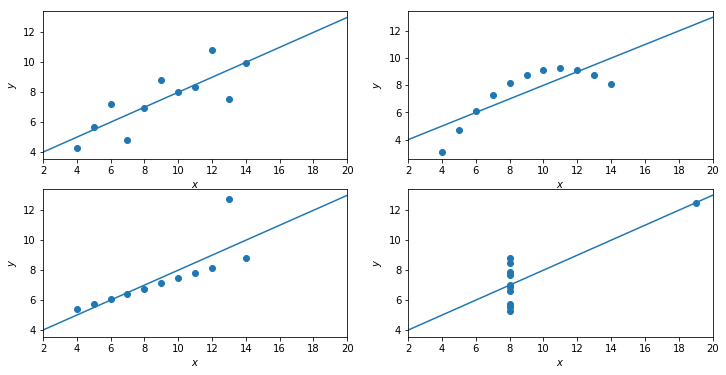

In [49]:
%matplotlib inline
from matplotlib import pyplot

fit_x = numpy.linspace(2.0, 20.0)
fig = pyplot.figure(figsize=(12,6))
for i in range(4):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_x[i], data_y[i])
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(data_x[i], data_y[i])
    ax.plot(fit_x, intercept + slope*fit_x)
    ax.set_xlim(2.0, 20.0)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
pyplot.show()